# VISUALIZATION LAB - Continuation of the EuroLeague Case Study
## Let's compare the competitions!

![](https://eurospects.com/wp-content/uploads/2018/10/eurocupeuroleague.png)

First of all, we must 

- Import the actual.csv Dataset. This dataset will be the CSV of the result obtained in class.
- Import ec23.xlsx. This dataset correspond to the import the dataset corresponding to Eurocup. Don't worry, this time the Excel will be cleaned (almost)


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
elteams=pd.read_csv("datasets/actual.csv")
ecteams=pd.read_excel("datasets/ec2023.xlsx", index_col=False)

In [3]:
elteams.sample()

,Competition,Phase,Ronda,Dia,Hora,Local,Visitante,Localscore,Roadscore,Arbitros,Plusminus,Winner,Ganador
156,Euroleague,Regular Season,18,2024-01-02,20:15:00,Olympiacos Piraeus,EA7 Emporio Armani Milan,79,74,"['LOTTERMOSER, ROBERT', 'PUKL,SASA', 'KARDUM, ...",5,Olympiacos Piraeus,Local


In [4]:
ecteams.drop_duplicates(inplace = True)
ecteams.dropna(inplace = True)
ecteams.drop('Unnamed: 0', inplace = True, axis=1 )

In [5]:
ecteams.reset_index(inplace = True, drop = True)

In [6]:
ecteams["Competition"] = "Eurocup"

In [7]:
ecteams.drop("Ganador", inplace=True, axis=1)

In [8]:
ecteams.rename(columns={"Winner":"Ganador"}, inplace=True)

In [9]:
ecteams.rename(columns={"Winner":"Ganador",
                       "fecha":"Fecha",
                        "ronda":"Ronda",
                        "local":"Local",
                        "visitante":"Visitante",
                        "localscore":"Localscore",
                        "roadscore":"Roadscore",
                        "plusminus":"Plusminus"
                       }, inplace=True)


In [10]:
comp_el = elteams[["Competition", "Localscore", "Roadscore", "Plusminus", "Ganador"]]

In [11]:
comp_ec = ecteams[["Competition", "Localscore", "Roadscore", "Plusminus", "Ganador"]]

In [12]:
competition = pd.concat([comp_el, comp_ec], axis=0, ignore_index=True)

In [13]:
competition.sample()


,Competition,Localscore,Roadscore,Plusminus,Ganador
149,Euroleague,85,84.0,1.0,Local


Based on the last lab, you should  have the combination of both competitions in the same dataframe. 

Is time for the questions you must answer... Graphically!

1. How many matches have been in each competition?
2. What are the maximum points that a local team has scored per competition? And the road team as well. 
3. Do the same operations with the average points (per competition)
4. Can you tell me the maximum difference that has been in a match, splitted by competition? 
    - Careful: The Plusminus is both positive and negative, being negative that the Road Team has achieved the Victory. To have the absolute, create a new Column named Absolut_Plusminus. Remember: np.where is life!
5. Also grouped by competition, give me the number of victories of the Locals and the Visitors

Text(0.5, 1.0, 'Games per competition')

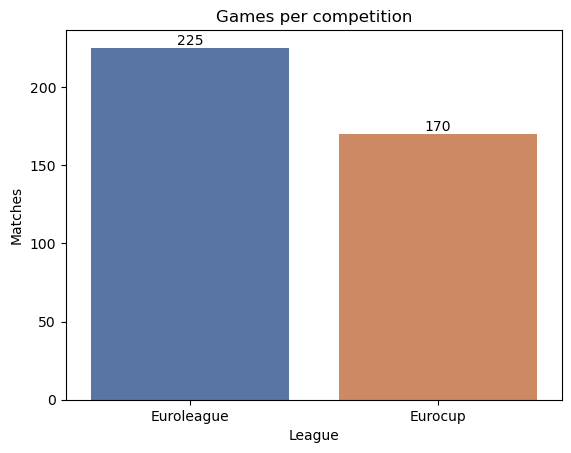

In [82]:
#1
barplot_matches = sns.countplot(x=competition["Competition"], palette="deep")
for i in barplot_matches.containers:
    barplot_matches.bar_label(i,)
plt.ylabel("Matches")
plt.xlabel("League")
plt.title("Games per competition")


In [18]:
# 1
competition[["Competition","Ganador"]].groupby("Competition").count()

,Ganador
Competition,
Eurocup,170
Euroleague,225


In [83]:
#2 What are the maximum points that a local team has scored per competition? And the road team as well.
competition.sample()

,Competition,Localscore,Roadscore,Plusminus,Ganador
135,Euroleague,92,98.0,-6.0,Visitante


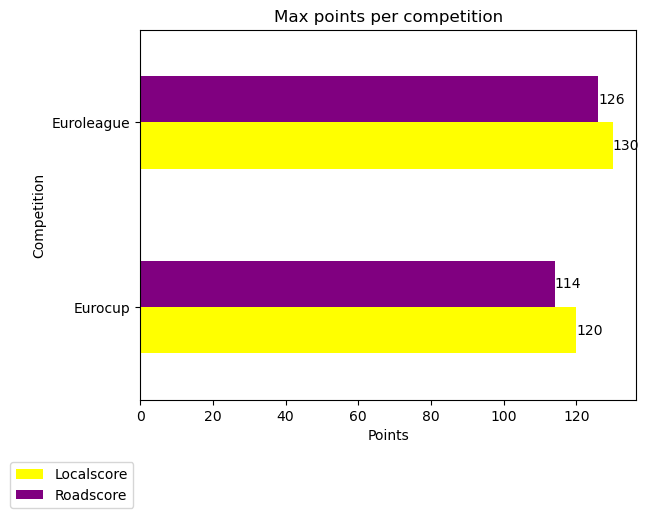

In [103]:
barplot_max_points = competition[["Competition","Localscore","Roadscore"]].groupby("Competition").max().plot(kind="barh", color=["yellow","purple"])
for i in barplot_max_points.containers:
    barplot_max_points.bar_label(i,)
plt.ylabel("Competition")
plt.xlabel("Points")
plt.title("Max points per competition")
plt.legend(bbox_to_anchor=(0, -0.15))

In [19]:
# 2
competition[["Competition","Localscore","Roadscore"]].groupby("Competition").max()

,Localscore,Roadscore
Competition,,
Eurocup,120,114.0
Euroleague,130,126.0


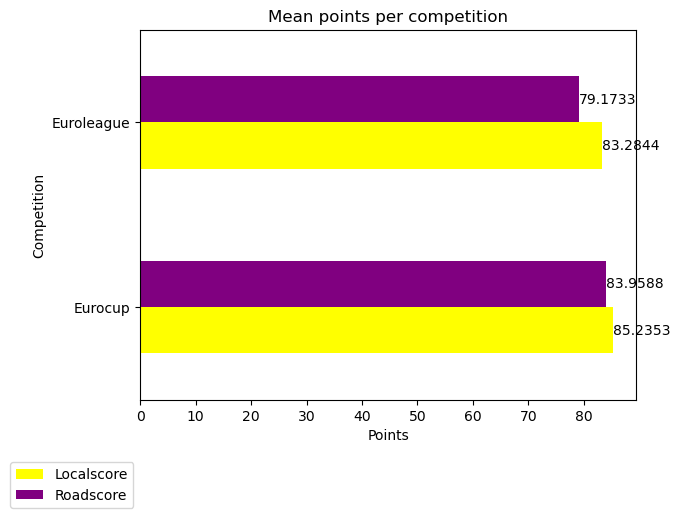

In [31]:
# 3 Do the same operations with the average points (per competition)
barplot_mean_points = competition[["Competition","Localscore","Roadscore"]].groupby("Competition").mean().plot(kind="barh", color=["yellow","purple"])
for i in barplot_mean_points.containers:
    barplot_mean_points.bar_label(i,)
plt.ylabel("Competition")
plt.xlabel("Points")
plt.title("Mean points per competition")
plt.legend(bbox_to_anchor=(0, -0.15)) 

''

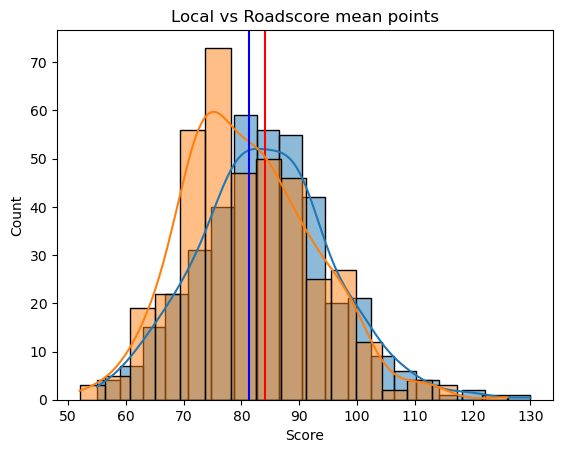

In [42]:
# Hacer con Histplot (no por competición pero quería probar con un histplot)
hist_mean_plot = sns.histplot(x = competition.Localscore, kde=True)
hist_mean_plot.axvline(x=competition.Localscore.mean(), c="red", label="mean")
plt.ylabel("Count")
plt.xlabel("Score")
plt.title("Local vs Roadscore mean points");

hist_mean_plot = sns.histplot(x = competition.Roadscore, kde=True, alpha=0.5)
hist_mean_plot.axvline(x=competition.Roadscore.mean(), c="Blue", label="mean")
;

In [20]:
# 3
competition[["Competition","Localscore","Roadscore"]].groupby("Competition").mean()

,Localscore,Roadscore
Competition,,
Eurocup,85.235294,83.958824
Euroleague,83.284444,79.173333


In [38]:
# 4 Can you tell me the maximum difference that has been in a match, splitted by competition?
competition["Absolut_Plusminus"] = np.where(competition["Ganador"] == "Visitante", competition["Plusminus"]*-1, competition["Plusminus"])


Text(0.5, 1.0, 'Euroleague vs. Eurocup plusminus max but in a boxplot')

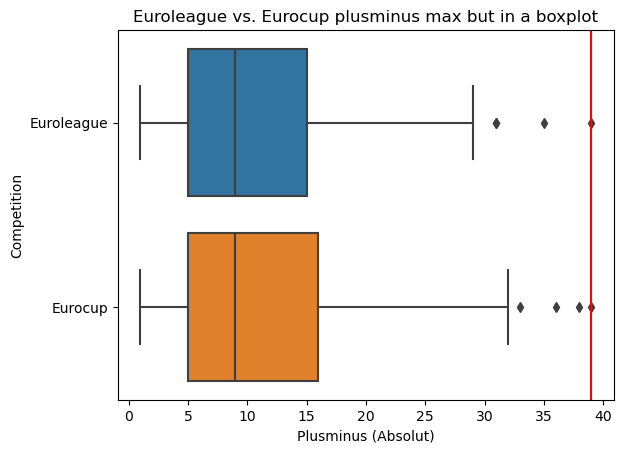

In [48]:
Plusminus_boxplot = sns.boxplot(data=competition, x="Absolut_Plusminus", y="Competition")
Plusminus_boxplot.axvline(x=competition.Absolut_Plusminus.max(), c="red", label="Max") #Quiero poner el máximo pero no se como hacerlo (en número)
plt.xlabel("Plusminus (Absolut)")
plt.title("Euroleague vs. Eurocup plusminus max but in a boxplot")

In [22]:
competition[["Competition","Absolut_Plusminus"]].groupby("Competition").max()

,Absolut_Plusminus
Competition,
Eurocup,39.0
Euroleague,39.0


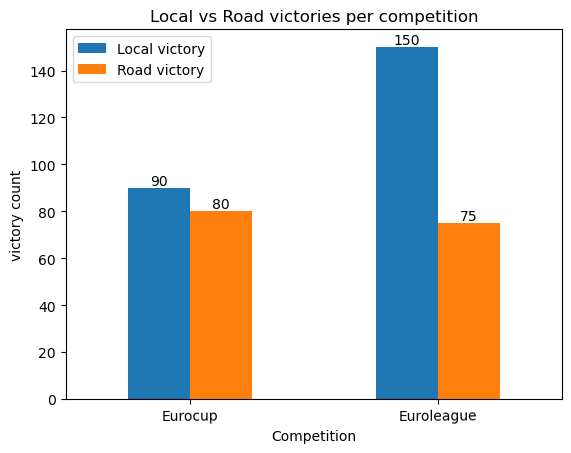

In [58]:
#5 Also grouped by competition, give me the number of victories of the Locals and the Visitors
number_of_victories = competition[["Competition","Local_victory", "Road_victory"]].groupby("Competition").sum().plot(kind="bar")
for i in number_of_victories.containers:
    number_of_victories.bar_label(i,)
plt.xticks(rotation=0.5)
plt.title("Local vs Road victories per competition")
plt.ylabel("victory count")
plt.legend(labels = ['Local victory', 'Road victory'])

In [49]:
# 5
competition["Local_victory"] = np.where(competition["Ganador"] == "Local", 1, 0)

In [50]:
competition["Road_victory"] = np.where(competition["Ganador"] == "Visitante", 1, 0)

In [51]:
competition[["Competition","Local_victory", "Road_victory"]].groupby("Competition").sum()


,Local_victory,Road_victory
Competition,,
Eurocup,90,80
Euroleague,150,75


In [59]:
#Los he hecho casi todos en barplot porque creo que es como mejor se puede entender lo que pedía la pregunta, he intentado hacer un poco de freestyle en algunos para que no fuera todo barplots.


# More Graphs!

Create one of each of the following graph types, with variables of your choice, and add at least two comments describing something interesting of each graph:

1. Comparison Charts (Barplot, Scatterplot or Countplot)
2. Histogram
3. Stack columns Chart
4. Correlation Matrix/Heatmap
5. Trends (Line Charts)

In [61]:
# Comparison Chart --> per competition, distribution of the points made by the Road and local team in a catplot
competition.sample()

,Competition,Localscore,Roadscore,Plusminus,Ganador,Absolut_Plusminus,Local_victory,Road_victory
194,Euroleague,98,75.0,23.0,Local,23.0,1,0


In [146]:
scores = competition.copy() ## ***HAY ALGUNA MANERA DE AHORRARME TODA ESTA PARTE DE CÓDIGO***


In [155]:
scores.sample()

,Competition,Localscore,Roadscore,Plusminus,Ganador,Absolut_Plusminus,Local_victory,Road_victory
88,Euroleague,75,77.0,-2.0,Visitante,2.0,0,1


In [156]:
l_scores=scores.drop(['Roadscore', 'Local_victory','Plusminus', 'Ganador',
       'Absolut_Plusminus', 'Road_victory'], axis=1)

In [157]:
l_scores["Equipo"] = "Local"

In [158]:
l_scores.rename(columns={"Localscore":"Score"}, inplace=True)


In [159]:
r_scores=scores.drop(['Localscore','Local_victory', 'Plusminus', 'Ganador',
       'Absolut_Plusminus', 'Road_victory'], axis=1)

In [160]:
r_scores["Equipo"] = "Road"

In [161]:
r_scores.rename(columns={"Roadscore":"Score"}, inplace=True)

In [162]:
total_scores = pd.concat([l_scores, r_scores], axis=0, ignore_index=True)

In [163]:
total_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Competition  790 non-null    object 
 1   Score        790 non-null    float64
 2   Equipo       790 non-null    object 
dtypes: float64(1), object(2)
memory usage: 18.6+ KB


C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Euroleague VS. Eurocup scores by side')

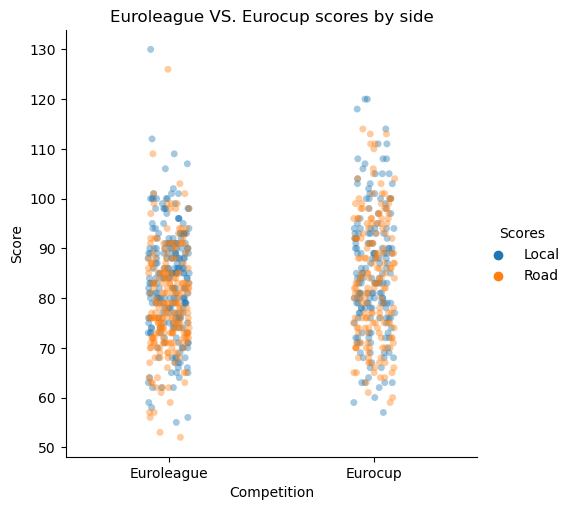

In [164]:
scores_catplot = sns.catplot(data=total_scores, x="Competition", y="Score", hue = "Equipo", alpha = 0.4)
scores_catplot._legend.set(title = "Scores")
plt.title("Euroleague VS. Eurocup scores by side")

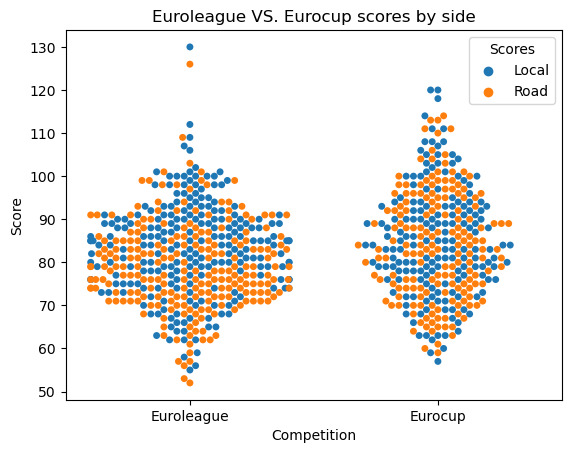

In [166]:
scores_catplot = sns.swarmplot(data=total_scores, x="Competition", y="Score", hue = "Equipo")
plt.title("Euroleague VS. Eurocup scores by side")
plt.legend(title = "Scores")

**Your comments here**
- A primera vista vemos que en la Eurocup, en general, en los partidos se anotan más puntos y de manera más dispersa que en el Euroleague, que en ese sentido es más regular. 
- En la Euroleague, un equipo local ha conseguido marcar el máximo de la temporada (al rededor de 130 puntos) igual que también, en la misma liga, se ha marcado el mínimo de puntos en un partido, esta vez por un equipo visitante (un poco menos de 55).
- Para ambas competiciones, parece que los equipos locales consiguen anotar más puntos que los visitantes. Siendo este efecto más notable en la Euroleague donde a partir de los 90 puntos anotados predominan los equipos locales. 
 - En el Swarmplot podemos ver mejor que en la Euroleague el efecto "Cancha" es más notorio. También podemos comprobar que la dispersión es mayor en la Eurocup. 

In [26]:
competition.sample()


,Competition,Localscore,Roadscore,Plusminus,Ganador,Absolut_plusminus
22,Euroleague,93,79.0,14.0,Local,14.0


In [18]:
competition["Absolut_plusminus"] = abs(competition["Plusminus"])

In [27]:
el = competition[competition.Competition == "Euroleague"]

In [28]:
ec = competition[competition.Competition == "Eurocup"]

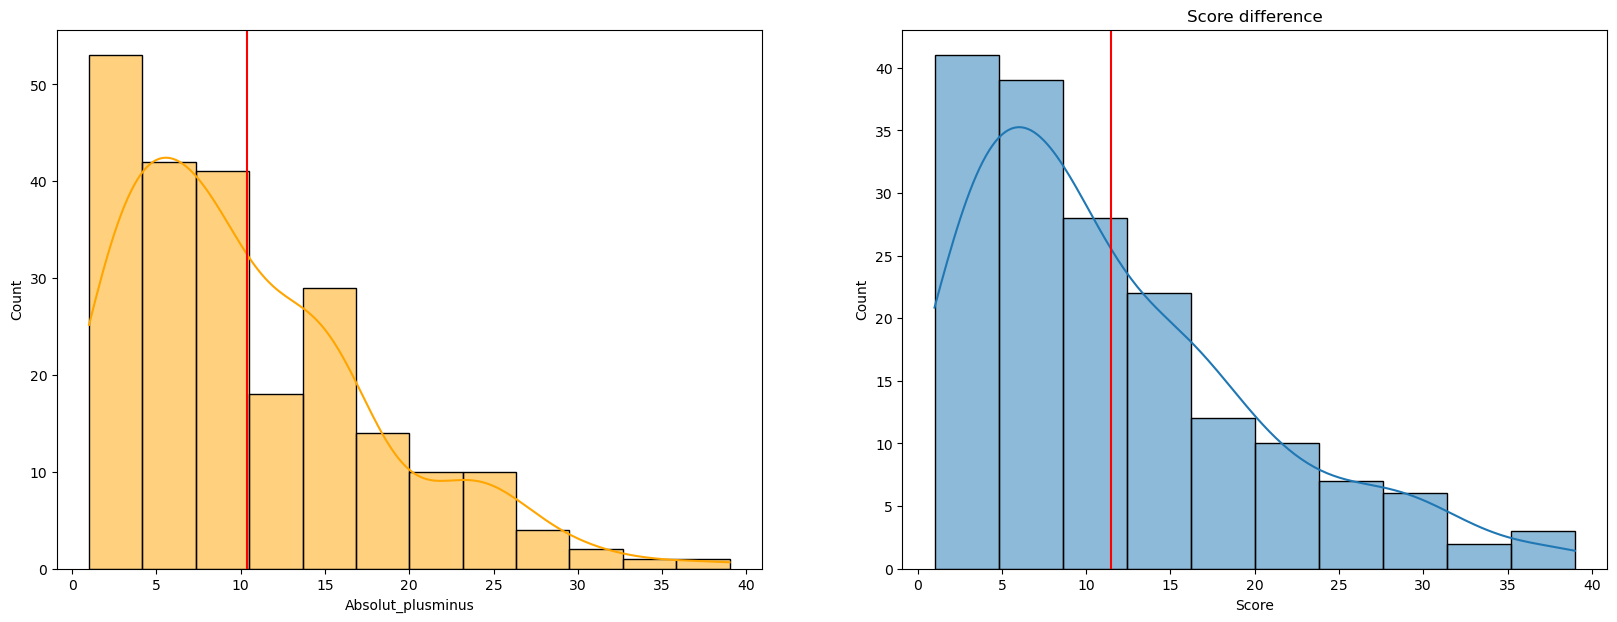

In [34]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,7))

el_hist_plusminus = sns.histplot(x = el.Absolut_plusminus, kde=True, ax=axs[0], color = "orange")
el_hist_plusminus.axvline(x=el.Absolut_plusminus.mean(), c="red", label="mean")
plt.ylabel("Count")
plt.xlabel("Score")
plt.title("Score difference");#No se por qué en este gráfico no se me cambian las cosas

ec_hist_plusminus = sns.histplot(x = ec.Absolut_plusminus, kde=True, ax=axs[1])
ec_hist_plusminus.axvline(x=ec.Absolut_plusminus.mean(), c="red", label="mean")
plt.ylabel("Count")
plt.xlabel("Score")
plt.title("Score difference");


**Your comments here**
- A simple vista, vemos que ambas competiciones tienen una diferencia de puntos entre ganador y perdedor bastante similar.Parece que en la Eurocup este efecto está más polarizado puesto que parece haber una mayor probabilidad que un equipo acabe en +25 puntos por encima del otro. 
- Las medias, sin embargo rondan los diez puntos de diferencia para ambas competiciones, siendo esta ligeramente superior en la Eurocup. 

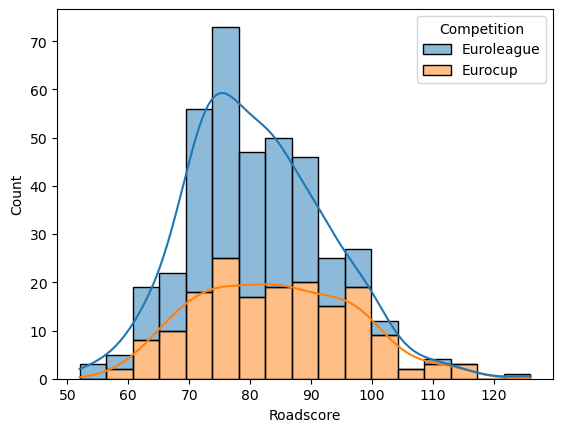

In [134]:
# Stacked columns
sns.histplot(data=competition, x="Roadscore", hue="Competition", multiple="stack",kde=True);

**Your comments here**
- Si observamos la distribución de la anotación de los visitantes por partido, comprobamos que el total de partido jugados en la Eurocup es menor.
- Así como que la distribución de la anotación de los visitantes es más dispersa en la Eurocup que en la Euroleague, donde parece haber una distribución más definida apuntando entre 70 - 80 puntos.

In [36]:
corr_df = competition.copy()

In [37]:
corr_df["Competition_num"] = np.where(competition["Competition"] == "Euroleague", 1, 0)

In [39]:
corr_df.drop("Competition", axis = 1, inplace=True)

In [42]:
corr_df["Ganador_num"] = np.where(competition["Ganador"] == "Local", 1, 0)

In [43]:
corr_df.drop("Ganador", axis = 1, inplace=True)

In [46]:
corr_df.drop("Absolut_plusminus", axis = 1, inplace=True)

In [53]:
corr_df.sample()

,Localscore,Roadscore,Plusminus,Competition_num,Ganador_num
236,68,92.0,-24.0,0,0


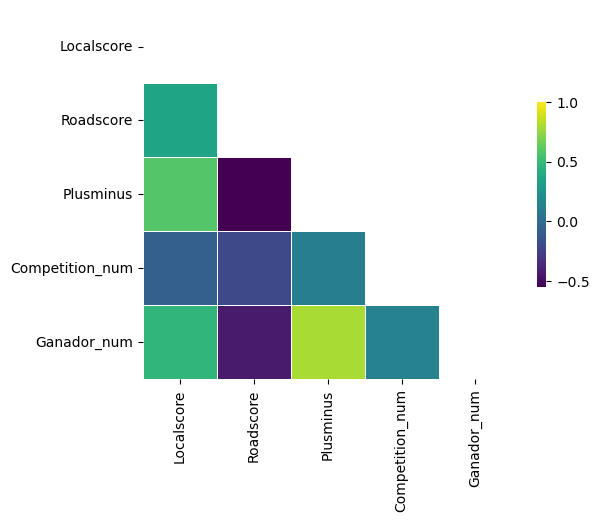

In [49]:
# Correlation / Heatmap
corr = corr_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
color_map = sns.diverging_palette(0, 10, as_cmap=True)
sns.heatmap(corr,
           mask = mask,
            cmap="viridis",
            square=True, 
            linewidth=0.5,
            vmax=1,
            cbar_kws={"shrink": .5});

**Your comments here**
- Observamos que las variables más correlacionadas positivamente es la de plusminus con Ganador puesto que, por así como tenemos hecho el Dataframe, plusminus siempre será positivo si Ganador es 1 (Local) y será negativo en caso de que Ganador sea 0 (Visitante).
- Las variables Roadscore & Localscore estan correlacionadas en un 50% (más o menos) con la variable Ganador pero Localscore positivamente mintras que Roadscore está correlacionada negativamente. Esto sucede debido a que cuando Ganador sea 0 (victoria Visitante) Roadscore será mayor. En cambio cuando Gandor sea 1 (victoria Local) Localscore será mayor. 

In [122]:
ec.sort_values("Localscore", ascending= False,inplace=True)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17572\3436895728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ec.sort_values("Localscore", ascending= False,inplace=True)


In [123]:
ec.head()

,index,Competition,Localscore,Roadscore,Plusminus,Ganador,Absolut_plusminus
87,87,Eurocup,120,111.0,9.0,Local,9.0
51,51,Eurocup,120,91.0,29.0,Local,29.0
44,44,Eurocup,118,101.0,17.0,Local,17.0
111,111,Eurocup,114,87.0,27.0,Local,27.0
0,0,Eurocup,111,113.0,-2.0,Visitante,2.0


In [124]:
ec.reset_index(inplace=True)

In [126]:
ec.drop("level_0", axis = 1, inplace=True)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17572\739588586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ec.drop("level_0", axis = 1, inplace=True)


In [128]:
ec.drop("index", axis = 1, inplace=True)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17572\644493724.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ec.drop("index", axis = 1, inplace=True)


In [129]:
ec

,Competition,Localscore,Roadscore,Plusminus,Ganador,Absolut_plusminus
0,Eurocup,120,111.0,9.0,Local,9.0
1,Eurocup,120,91.0,29.0,Local,29.0
2,Eurocup,118,101.0,17.0,Local,17.0
3,Eurocup,114,87.0,27.0,Local,27.0
4,Eurocup,111,113.0,-2.0,Visitante,2.0
...,...,...,...,...,...,...
165,Eurocup,63,68.0,-5.0,Visitante,5.0
166,Eurocup,62,63.0,-1.0,Visitante,1.0
167,Eurocup,60,98.0,-38.0,Visitante,38.0
168,Eurocup,59,61.0,-2.0,Visitante,2.0


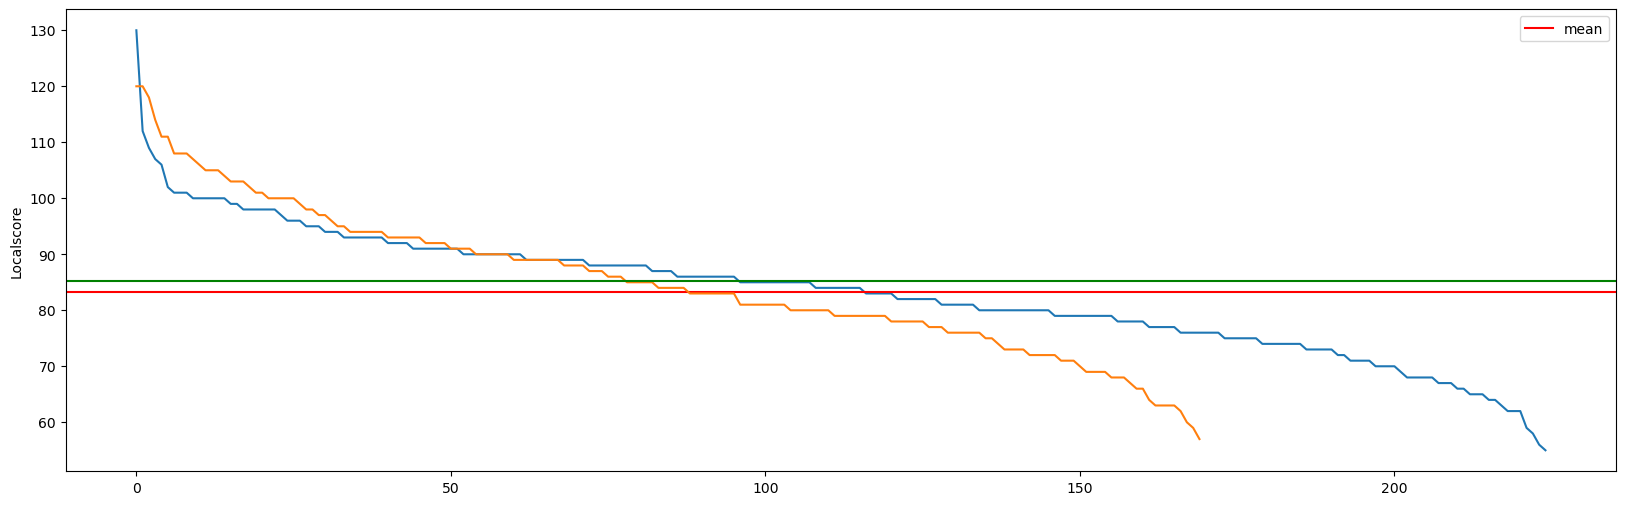

In [132]:
# Trends
fig, ax = plt.subplots(figsize=(20, 6))
Local_score_dif = sns.lineplot(x=el.index, y = 'Localscore', data = el,ax = ax)
Local_score_dif.axhline(y=el.Localscore.mean(), c="red", label="mean")
sns.lineplot(x=ec.index, y = 'Localscore', data = ec,ax = ax)
Local_score_dif.axhline(y=ec.Localscore.mean(), c="green", label="mean")

**Your comments here**
- Pintamos las distribuciones de los localscores para ambas competiciones ordenadas de mayor a menor. Observamos que, en la Eurocup se han jugado menos partidos que en la Euroleague
- La Eurocup tiene una media superior en cuanto a puntos anotan los locales, así como se ve que, en la primera mitad del gráfico, la Eurocup está por encima, lo que significa que, en los partidos que más se anota, en la Eurocup anotan más que en la Euroliga. 
